<a href="https://colab.research.google.com/github/udaybhaskar717/Analysing-Mumbai-Neighborhoods/blob/master/PV_system_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
def I_V_curve(parameters):
    [Iph,Isat,Rs,eta,Ncell,Rsh]=parameters

    def func(v,parameters):
        ''' This function returns a function with current i as variable for every voltage v '''
        [Iph,Isat,Rs,eta,Ncell,Rsh]=parameters                                                                                                      #  (9.8,1.02e-8,0.2775,1.18,4155.19)
        return lambda i:((i-Iph)+(Isat)*(np.exp((v+i*(Rs))/(eta*Ncell*((1.380649e-23)*(298.15/(1.60217662e-19)))))-1)+((v+i*(Rs))/(Rsh)))

    def fun_voc(initialguess,parameters):
        V_oc=initialguess
        [Iph,Isat,Rs,eta,Ncell,Rsh]=parameters
        V=eta*Ncell*((1.380649e-23)*(298.15/(1.60217662e-19)))*np.log(((Iph-V_oc/Rsh)+Isat)/(Isat))-V_oc
        return V

    V_oc=fsolve(fun_voc,(0.02),([Iph,Isat,Rs,eta,Ncell,Rsh]))
    v=np.arange(0,V_oc+1,1)                                                                                                                      # generating array of voltage values
    I=np.zeros(len(v))                                                                                                                               # generating Current array with size len(v) 
    i=0
    initial_value=0

    for v_ in v:
        I[i]=fsolve(func(v_,(Iph,Isat,Rs,eta,Ncell,Rsh)),initial_value)[0]                                                                           # 1.5 is the inital guess given to function func to solve for Current i and stored in current array I
        initial_value=I[i]
        i+=1
    p=v*I                                                                                                                                            # power is voltage * Current
    max_index=np.argmax(p)                                                                                                                           # Find the Maximum Power Point
    v_mp=v[max_index]                                                                                                                                # Using Obtained Index to get Voltage At maximum Power point
    i_mp=I[max_index]
                                                                                                                                                     # print("Voc :-",V_oc[0],"\n","Isc:-",I.max())
    return (v,I,v_mp,v_mp*i_mp)

In [9]:
def IV_curve_plot(v,i):
    p=v*i                                                                       # power is voltage * Current
    max_index=np.argmax(p)                                                      # Find the Maximum Power Point
    v_mp=v[max_index]                                                           # Using Obtained Index to get Voltage At maximum Power point
    i_mp=i[max_index]
                                                                                 # print(v_mp,i_mp)
    plt.plot(v,i);                                                              # ploting Voltage vs Current
    plt.grid()
                                                                                # plt.legend(module, loc ="lower right")
    plt.xlabel("Volatge")
    plt.ylabel("Current")
    plt.grid()
    plt.plot(v_mp,i_mp,marker='o',label="Pmax")
    plt.axvline(v_mp,color="black",linestyle='--')
    plt.axhline(y=i_mp,linestyle ="--",color ='red')                           # plt.annotate("-------------Pmax_point",(v_mp,i_mp))

In [10]:
v_A,i_A,v_mp,pmax_A=I_V_curve([9.2*1, 5.00456e-10*1, 0.324*16/1, 1.18,72*16, 252*16/1])

# v_B,i_B,pmax_B=I_V_curve([9.8, 1.02e-08, 0.555, 1.18,72,200.76])

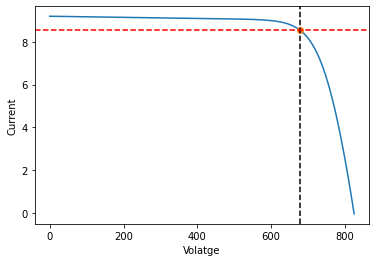

In [11]:
IV_curve_plot(v_A,i_A)
# IV_curve_plot(v_B,i_B)

# Reading The data

In [15]:
# df_A=pd.read_csv('/content/drive/MyDrive/Bhadla_Solcast/Bhadla_2020_POA.csv')
df_A=pd.read_csv('/content/drive/MyDrive/IITB_Floating_Solar_Plant/POA.csv')

In [16]:
df_A['Date']=pd.to_datetime(df_A['Date'])
df_A['Date']=df_A.Date.dt.tz_convert('Asia/Kolkata')

# Cell Temperature

In [17]:
df_A["AirTemp"]=df_A["AirTemp"]+273.15

In [18]:
df_A["Tc"]=df_A["AirTemp"]+df_A["POA"]*(0.9*(1-(0.1632)))/(29)

In [19]:
df_A

,Date,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Predicted,POA,Tc
0,2022-01-01 06:00:00+05:30,297.35,-110,48.4,15.6,0,0,0,30.3,58.9,1045.5,65,3.5,105.0,0.11,0.108439,0.106382,297.352763
1,2022-01-01 06:15:00+05:30,297.25,-111,24.6,15.6,0,0,0,30.4,59.0,1045.6,66,3.5,101.0,0.11,0.108439,0.106382,297.252763
2,2022-01-01 06:30:00+05:30,297.25,-112,22.4,15.6,0,0,0,30.5,59.1,1045.8,65,3.6,98.0,0.11,0.108439,0.106382,297.252763
3,2022-01-01 06:45:00+05:30,297.25,-113,6.5,15.7,0,0,0,30.6,59.3,1046.0,64,3.6,95.0,0.11,0.108439,0.106382,297.252763
4,2022-01-01 07:00:00+05:30,297.25,-114,17.6,15.7,0,0,0,30.7,59.4,1046.2,63,3.6,92.0,0.11,0.108439,0.106382,297.252763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33976,2022-12-21 04:00:00+05:30,298.25,-105,0.1,13.7,0,0,0,21.0,49.1,1039.0,83,2.6,131.0,0.11,0.108439,0.106382,298.252763
33977,2022-12-21 04:15:00+05:30,298.25,-105,0.0,13.5,0,0,0,21.0,48.6,1039.0,85,2.7,127.0,0.11,0.108439,0.106382,298.252763
33978,2022-12-21 04:30:00+05:30,298.15,-106,0.0,13.3,0,0,0,21.1,48.2,1039.1,86,2.7,124.0,0.11,0.108439,0.106382,298.152763
33979,2022-12-21 04:45:00+05:30,298.15,-107,0.0,13.1,0,0,0,21.1,47.7,1039.2,85,2.7,120.0,0.11,0.108439,0.106382,298.152763


In [34]:

df_A['Isc(G,T)']   =   (df_A["POA"]/1000)*(1*9.2*(1+0.051e-2*(df_A["Tc"]-298.15)))

df_A["Rs(G,T)"]    =   0.324*(16)

df_A["Rsh(G,T)"]   =   (df_A["POA"]/1000)*(252*16)

df_A["eta(G,T)"]   =   1.18

df_A["Ncell"]      =   72*16


df_A["Iph(G,T)"]   =   (df_A['Isc(G,T)'])*(1+((df_A["Rs(G,T)"])/(df_A["Rsh(G,T)"])))

df_A["Isat(G,T)"]  =   5.00456e-10*1*((df_A["Tc"])/298.15)**3*np.exp((1.60217662e-19*1.1*(1.6* 10**(-19)))/(1.18*1.38064852e-23)*((1/298)-(1/(df_A["Tc"]))))

In [35]:
df_A

,Date,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,PrecipitableWater,RelativeHumidity,...,Predicted,POA,Tc,"Isc(G,T)","Rs(G,T)","Rsh(G,T)","eta(G,T)",Ncell,"Iph(G,T)","Isat(G,T)"
0,2022-01-01 06:00:00+05:30,297.35,-110,48.4,15.6,0,0,0,30.3,58.9,...,0.108439,0.106382,297.352763,0.000978,5.184,0.428932,1.18,1152,0.012802,4.964521e-10
1,2022-01-01 06:15:00+05:30,297.25,-111,24.6,15.6,0,0,0,30.4,59.0,...,0.108439,0.106382,297.252763,0.000978,5.184,0.428932,1.18,1152,0.012801,4.959514e-10
2,2022-01-01 06:30:00+05:30,297.25,-112,22.4,15.6,0,0,0,30.5,59.1,...,0.108439,0.106382,297.252763,0.000978,5.184,0.428932,1.18,1152,0.012801,4.959514e-10
3,2022-01-01 06:45:00+05:30,297.25,-113,6.5,15.7,0,0,0,30.6,59.3,...,0.108439,0.106382,297.252763,0.000978,5.184,0.428932,1.18,1152,0.012801,4.959514e-10
4,2022-01-01 07:00:00+05:30,297.25,-114,17.6,15.7,0,0,0,30.7,59.4,...,0.108439,0.106382,297.252763,0.000978,5.184,0.428932,1.18,1152,0.012801,4.959514e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33976,2022-12-21 04:00:00+05:30,298.25,-105,0.1,13.7,0,0,0,21.0,49.1,...,0.108439,0.106382,298.252763,0.000979,5.184,0.428932,1.18,1152,0.012808,5.009737e-10
33977,2022-12-21 04:15:00+05:30,298.25,-105,0.0,13.5,0,0,0,21.0,48.6,...,0.108439,0.106382,298.252763,0.000979,5.184,0.428932,1.18,1152,0.012808,5.009737e-10
33978,2022-12-21 04:30:00+05:30,298.15,-106,0.0,13.3,0,0,0,21.1,48.2,...,0.108439,0.106382,298.152763,0.000979,5.184,0.428932,1.18,1152,0.012807,5.004699e-10
33979,2022-12-21 04:45:00+05:30,298.15,-107,0.0,13.1,0,0,0,21.1,47.7,...,0.108439,0.106382,298.152763,0.000979,5.184,0.428932,1.18,1152,0.012807,5.004699e-10


In [36]:
x_A=df_A[['Iph(G,T)','Isat(G,T)','Rs(G,T)','eta(G,T)','Ncell','Rsh(G,T)']].iloc[:96*10,:].apply(I_V_curve,axis=1) # Applying Every hour parameters to calculate Pmax

In [37]:
# x_A=df_A[['Iph(G,T)','Isat(G,T)','Rs(G,T)','eta(G,T)','Ncell','Rsh(G,T)']].iloc[:4,:].apply(I_V_curve,axis=1)

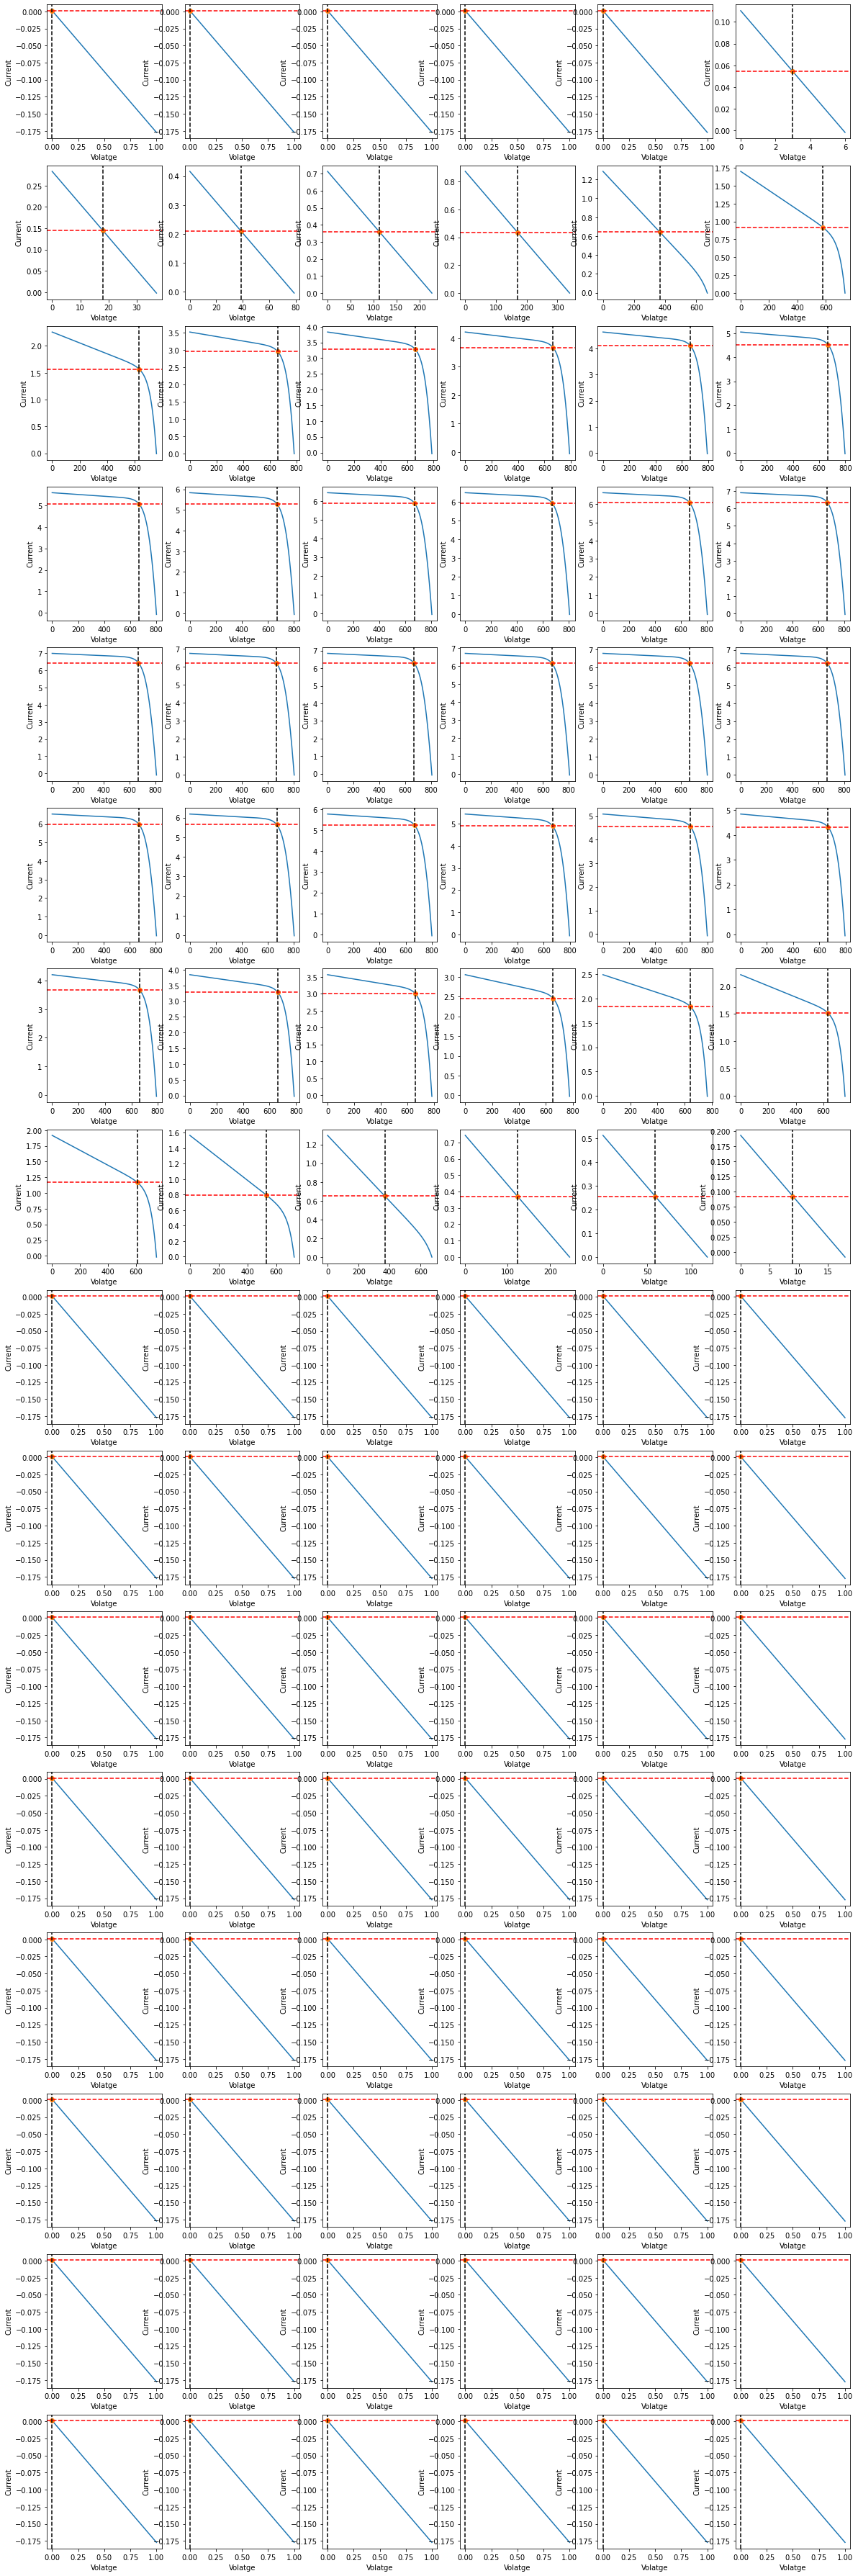

In [38]:
fig = plt.figure(figsize=(20,65))
for i,j in enumerate(x_A.index[96:96*2]):
    plt.subplot(16, 6, i+1)
    IV_curve_plot(x_A.iloc[j][0],x_A.iloc[j][1])

In [39]:
x_A

0      ([0.0, 1.0], [0.0009783163179201471, -0.177181...
1      ([0.0, 1.0], [0.0009782664034931811, -0.177181...
2      ([0.0, 1.0], [0.0009782664034931811, -0.177181...
3      ([0.0, 1.0], [0.0009782664034931811, -0.177181...
4      ([0.0, 1.0], [0.0009782664034931811, -0.177181...
                             ...                        
955    ([0.0, 1.0], [0.0009761699975605966, -0.177183...
956    ([0.0, 1.0], [0.0009761699975605966, -0.177183...
957    ([0.0, 1.0], [0.0009761200831336302, -0.177183...
958    ([0.0, 1.0], [0.0009761200831336302, -0.177183...
959    ([0.0, 1.0], [0.0009761200831336302, -0.177183...
Length: 960, dtype: object

In [40]:
def Module_yield(x):
    E=[]
    for i in x.index:
        E.append((x[i][2],x[i][3]))
    return E

In [ ]:
Module_yield(x_A)

In [77]:
df_power=pd.DataFrame(Module_yield(x_A),index=df_A.iloc[:96*10,0],columns=["Max_Vdc","Max_Pdc"])

# Maximum Power Developed at Every Instant

In [78]:
df_power['Tc']=df_A.iloc[:96*10,-8].tolist()
df_power['Max_Pdc']=df_power['Max_Pdc']*(1-0.3859e-2*(df_power['Tc']-298.15))

In [79]:
df_power

,Max_Vdc,Max_Pdc,Tc
Date,,,
2022-01-01 06:00:00+05:30,0.0,0.0,297.352763
2022-01-01 06:15:00+05:30,0.0,0.0,297.252763
2022-01-01 06:30:00+05:30,0.0,0.0,297.252763
2022-01-01 06:45:00+05:30,0.0,0.0,297.252763
2022-01-01 07:00:00+05:30,0.0,0.0,297.252763
...,...,...,...
2022-01-11 04:45:00+05:30,0.0,0.0,293.052763
2022-01-11 05:00:00+05:30,0.0,0.0,293.052763
2022-01-11 05:15:00+05:30,0.0,0.0,292.952763


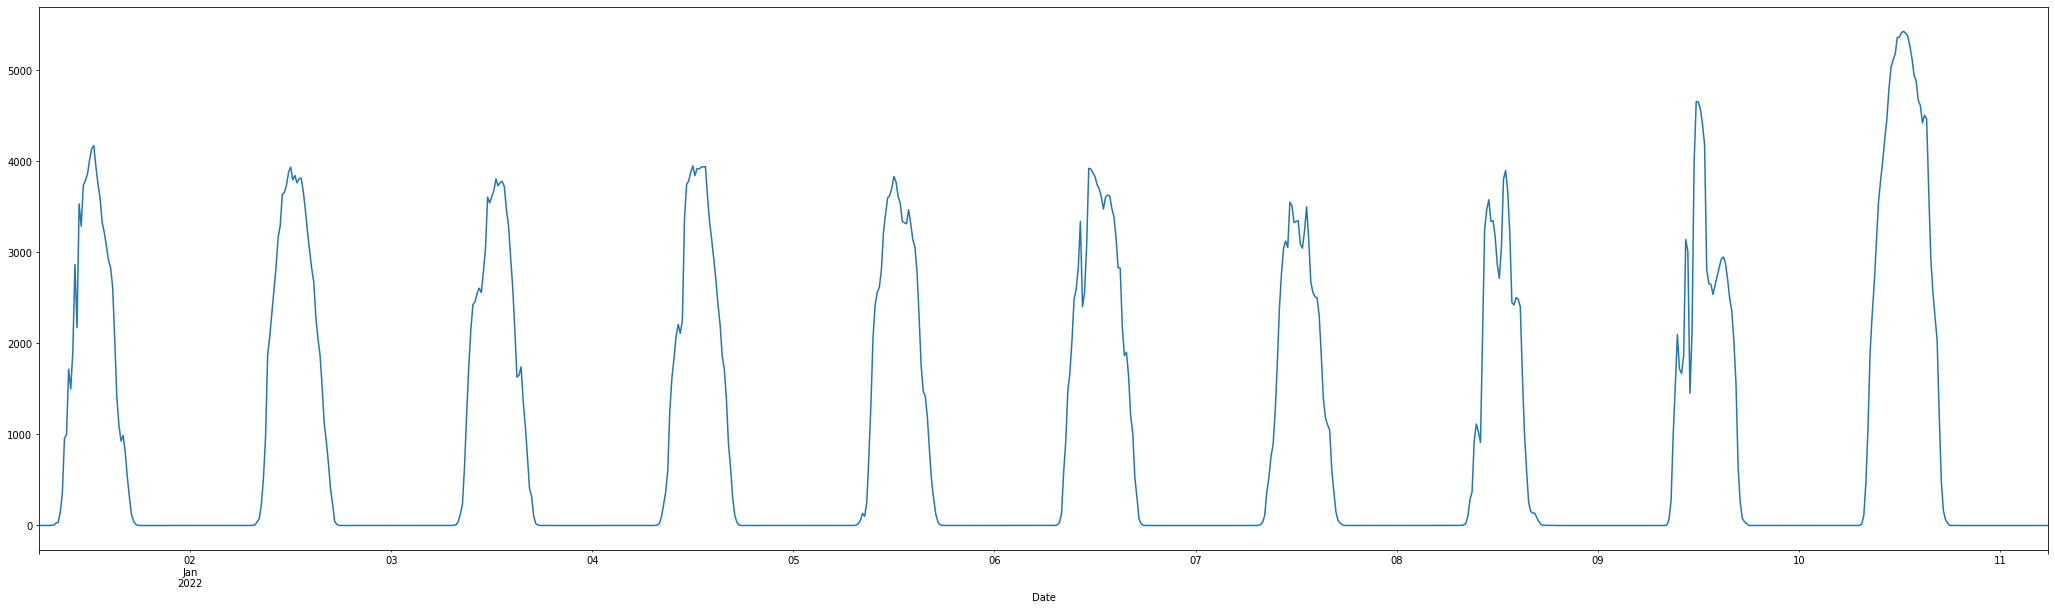

In [80]:
df_power['Max_Pdc'].plot(figsize=(36,10))

# To_CSV

In [81]:
df_power.to_csv("/content/drive/MyDrive/IITB_Floating_Solar_Plant/DC_Power_Generated.csv")